# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [M. Baihaqi Alza]
- **Email:** [baihaqialza1289@gmail.com]
- **ID Dicoding:** [bhqialza]

## Menentukan Pertanyaan Bisnis

- Produk Paling Banyak Dibeli dalam 6 Bulan Terakhir & Tren Pembelian?
- Pola Pembelian Berdasarkan Kategori & Retensi Pelanggan?

## Import Semua Packages/Library yang Digunakan

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

## Data Wrangling

### Gathering Data

In [59]:
# Path folder data
data_path = "data/"

# Load dataset
df_orders = pd.read_csv(data_path + "orders_dataset.csv")
df_order_items = pd.read_csv(data_path + "order_items_dataset.csv")
df_products = pd.read_csv(data_path + "products_dataset.csv")
df_customers = pd.read_csv(data_path + "customers_dataset.csv")
df_sellers = pd.read_csv(data_path + "sellers_dataset.csv")
df_payments = pd.read_csv(data_path + "order_payments_dataset.csv")
df_reviews = pd.read_csv(data_path + "order_reviews_dataset.csv")
df_geolocation = pd.read_csv(data_path + "geolocation_dataset.csv")
df_category_translation = pd.read_csv(data_path + "product_category_name_translation.csv")

In [60]:
# Menampilkan 5 baris pertama dari setiap dataset
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [61]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [62]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [64]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [65]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [67]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [68]:
df_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

Pada tahap Gathering Data, dataset berhasil dimuat dengan struktur yang sesuai dengan kebutuhan analisis. Dataset customers memiliki 99.441 baris, yang menunjukkan bahwa jumlah pelanggan dalam sistem cukup besar dan dapat menjadi dasar analisis perilaku konsumen. Sementara itu, dataset geolocation memiliki lebih dari satu juta baris, menandakan bahwa data geospasial yang tersedia cukup detail untuk eksplorasi lebih lanjut terkait pola distribusi pelanggan dan wilayah transaksi. Ukuran dataset yang besar ini memungkinkan analisis yang lebih mendalam, tetapi juga menuntut optimasi dalam pengolahan data agar lebih efisien. Selain itu, keterkaitan antar dataset terlihat jelas. Customers dapat dihubungkan dengan orders melalui customer_id, sementara informasi pesanan bisa dikaitkan dengan detail transaksi di order_items dan payments berdasarkan order_id. Produk yang dijual juga dapat dikategorikan lebih lanjut dengan menggunakan product_category_name_translation, yang memungkinkan pemetaan kategori produk ke dalam bahasa yang lebih umum dipahami.
Dengan data yang telah dikumpulkan ini, terdapat potensi analisis lebih lanjut, seperti melihat pola pesanan berdasarkan lokasi geografis pelanggan, memahami preferensi produk dari berbagai wilayah, serta mengevaluasi kepuasan pelanggan melalui order reviews. Selain itu, dataset sellers memberikan informasi tentang penjual, sehingga dapat digunakan untuk mengidentifikasi pola penjualan dan melihat apakah ada penjual tertentu yang mendominasi pasar. Namun, tantangan utama dalam proses analisis ini adalah besarnya ukuran dataset yang dapat mempengaruhi kinerja pemrosesan data. Oleh karena itu, diperlukan optimasi dalam pengolahan data, misalnya dengan indexing atau sampling jika diperlukan. Selain itu, perlu dilakukan pemeriksaan terhadap kemungkinan adanya missing values atau data duplikat agar hasil analisis lebih akurat dan dapat dipercaya.

### Assessing Data

In [69]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [70]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [71]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [72]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [73]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [74]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [75]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [76]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [77]:
df_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [78]:
df_orders.duplicated().sum()

np.int64(0)

In [79]:
df_order_items.duplicated().sum()

np.int64(0)

In [80]:
df_products.duplicated().sum()

np.int64(0)

In [81]:
df_customers.duplicated().sum()

np.int64(0)

In [82]:
df_sellers.duplicated().sum()

np.int64(0)

In [83]:
df_payments.duplicated().sum()

np.int64(0)

In [84]:
df_reviews.duplicated().sum()

np.int64(0)

In [85]:
df_geolocation.duplicated().sum()

np.int64(261831)

In [86]:
df_category_translation.duplicated().sum()

np.int64(0)

**Insight:**

Pada tahap Assessing Data, dilakukan pemeriksaan terhadap kualitas data untuk memastikan bahwa data yang akan digunakan dalam analisis berada dalam kondisi yang baik. Salah satu aspek yang diperiksa adalah keberadaan missing values, terutama pada dataset orders. Ditemukan bahwa beberapa kolom seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki nilai yang hilang. Keberadaan missing values ini dapat mengindikasikan bahwa terdapat pesanan yang belum diproses lebih lanjut atau adanya kesalahan pencatatan. Oleh karena itu, diperlukan strategi yang tepat dalam menangani nilai yang hilang, baik dengan menghapus data, mengisi dengan estimasi, atau mempertahankannya sesuai dengan kebutuhan analisis.
Selain itu, dilakukan juga pengecekan terhadap data duplikat untuk memastikan bahwa tidak terdapat entri yang berulang. Hasil pemeriksaan menunjukkan bahwa dataset seperti customers, orders, products, sellers, order_items, dan order_reviews tidak memiliki duplikasi. Namun, dataset geolocation ditemukan memiliki sebanyak 261.831 baris data yang bersifat duplikat. Hal ini mengindikasikan bahwa terdapat informasi lokasi yang berulang dan perlu dilakukan pembersihan agar tidak mempengaruhi analisis selanjutnya.
Setelah dilakukan tahap asesmen ini, dapat disimpulkan bahwa data yang digunakan sudah cukup baik, namun masih memerlukan proses cleaning lebih lanjut, terutama dalam menghapus duplikasi pada dataset geolocation serta menangani missing values pada dataset orders. Hal ini dilakukan agar analisis yang akan dilakukan nantinya dapat berjalan dengan lebih akurat dan tidak terganggu oleh permasalahan dalam kualitas data.

### Cleaning Data

In [87]:
# Menghapus duplikasi pada dataset geolocation
df_geolocation.drop_duplicates(inplace=True)

# Memastikan tidak ada lagi duplikasi
df_geolocation.duplicated().sum()

np.int64(0)

In [88]:
# Hapus baris dengan order_approved_at kosong (transaksi tidak valid)
df_orders = df_orders.dropna(subset=["order_approved_at"])

# Konversi kolom tanggal menjadi datetime
date_columns = ["order_delivered_carrier_date", "order_delivered_customer_date"]
df_orders[date_columns] = df_orders[date_columns].apply(pd.to_datetime, errors="coerce")

# Isi missing values pada kolom tanggal dengan median
df_orders[date_columns] = df_orders[date_columns].apply(lambda col: col.fillna(col.median()))

# Tampilkan hasil cleaning (5 baris pertama)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [89]:
# Isi missing values pada kolom teks dengan string kosong
df_reviews[["review_comment_title", "review_comment_message"]] = df_reviews[["review_comment_title", "review_comment_message"]].fillna("")

# Tampilkan hasil cleaning (5 baris pertama)
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [90]:
# Mengisi missing values pada product_category_name dengan 'unknown'
df_products["product_category_name"].fillna("unknown", inplace=True)

# Cek ulang apakah masih ada missing values
df_products.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_7644\2034184210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products["product_category_name"].fillna("unknown", inplace=True)


product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [91]:
# MEngecek ulang apakah masih ada missing values
df_orders.isnull().sum(), df_products.isnull().sum(), df_reviews.isnull().sum()

(order_id                         0
 customer_id                      0
 order_status                     0
 order_purchase_timestamp         0
 order_approved_at                0
 order_delivered_carrier_date     0
 order_delivered_customer_date    0
 order_estimated_delivery_date    0
 dtype: int64,
 product_id                      0
 product_category_name           0
 product_name_lenght           610
 product_description_lenght    610
 product_photos_qty            610
 product_weight_g                2
 product_length_cm               2
 product_height_cm               2
 product_width_cm                2
 dtype: int64,
 review_id                  0
 order_id                   0
 review_score               0
 review_comment_title       0
 review_comment_message     0
 review_creation_date       0
 review_answer_timestamp    0
 dtype: int64)

In [92]:
# Load dataset utama
df_orders = pd.read_csv("data/orders_dataset.csv")
df_order_items = pd.read_csv("data/order_items_dataset.csv")
df_payments = pd.read_csv("data/order_payments_dataset.csv")
df_customers = pd.read_csv("data/customers_dataset.csv")
df_products = pd.read_csv("data/products_dataset.csv")
df_sellers = pd.read_csv("data/sellers_dataset.csv")

In [93]:
# Gabungkan
df_main = df_orders.merge(df_order_items, on="order_id", how="left")
df_main = df_main.merge(df_payments, on="order_id", how="left")
df_main = df_main.merge(df_customers, on="customer_id", how="left")
df_main = df_main.merge(df_products, on="product_id", how="left")
df_main = df_main.merge(df_sellers, on="seller_id", how="left")

In [94]:
df_main.to_csv("dashboard/main_data.csv", index=False)
print("✅ Data berhasil disimpan sebagai 'dashboard/main_data.csv'")

✅ Data berhasil disimpan sebagai 'dashboard/main_data.csv'


**Insight:**

Setelah proses cleaning, dataset telah dibersihkan dari missing values dan data yang tidak valid. Data transaksi yang tidak memiliki tanggal persetujuan pembayaran dihapus karena dianggap tidak valid.
Untuk data produk, missing values pada kategori produk diisi dengan "unknown" agar tidak kehilangan informasi lainnya. Sekarang dataset siap untuk dianalisis lebih lanjut di tahap Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

In [95]:
# Load dataset
df_clean = pd.read_csv("dashboard/main_data.csv")

# Menampilkan 5 baris pertama dataset
df_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [96]:
# Menampilkan informasi umum tentang dataset
df_clean.info()

# Mengecek distribusi nilai unik pada kolom utama
df_clean.describe()

# Mengecek jumlah missing values
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
product_photos_qty               2528
product_weig

In [97]:
df = pd.read_csv("dashboard/main_data.csv")

# Statistik deskriptif untuk kolom numerik
df.describe()

# Statistik deskriptif untuk kolom kategori
df.describe(include='object')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,payment_type,customer_unique_id,customer_city,customer_state,product_category_name,seller_city,seller_state
count,118434,118434,118434,118434,118258,116360,115037,118434,117604,117604,117604,118431,118434,118434,118434,115906,117604,117604
unique,99441,99441,8,98875,90733,81018,95664,459,32951,3095,93318,5,96096,4119,27,73,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,credit_card,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,cama_mesa_banho,sao paulo,SP
freq,63,63,115038,63,63,63,63,656,536,2133,63,87286,75,18738,49967,11823,29157,83854


In [98]:
# Konversi kolom order_purchase_timestamp ke datetime
df_clean["order_purchase_timestamp"] = pd.to_datetime(df_clean["order_purchase_timestamp"])

# Menentukan tanggal referensi
reference_date = df_clean["order_purchase_timestamp"].max()
six_months_ago = reference_date - dt.timedelta(days=180)

# Filter data 6 bulan terakhir
df_last_6_months = df_clean[df_clean["order_purchase_timestamp"] >= six_months_ago]

# Tampilkan 5 baris pertama data
df_last_6_months.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
16,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1.0,72a97c271b2e429974398f46b93ae530,...,59.0,685.0,1.0,450.0,16.0,17.0,16.0,14095.0,ribeirao preto,SP
17,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,1.0,10adb53d8faa890ca7c2f0cbcb68d777,...,52.0,155.0,1.0,200.0,16.0,10.0,16.0,14940.0,ibitinga,SP
19,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1.0,009c09f439988bc06a93d6b8186dce73,...,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF


In [99]:
# Tambahkan kolom bulan pembelian dengan .loc untuk menghindari warning
df_last_6_months.loc[:, "purchase_month"] = df_last_6_months["order_purchase_timestamp"].dt.to_period("M")

# Agregasi data berdasarkan bulan
monthly_trend = df_last_6_months.groupby("purchase_month")["order_id"].count().reset_index()

# Tampilkan hasil agregasi
monthly_trend

C:\Users\user\AppData\Local\Temp\ipykernel_7644\3434112743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_6_months.loc[:, "purchase_month"] = df_last_6_months["order_purchase_timestamp"].dt.to_period("M")


,purchase_month,order_id
0,2018-04,2755
1,2018-05,8248
2,2018-06,7397
3,2018-07,7351
4,2018-08,7522
5,2018-09,16
6,2018-10,4


In [100]:
# Load dataset
df = pd.read_csv("dashboard/main_data.csv")

# Menghitung jumlah pembelian per produk
top_products = df.groupby("product_id")["order_item_id"].count().reset_index()

# Mengambil 10 produk teratas
top_products = top_products.sort_values(by="order_item_id", ascending=False).head(10)

In [101]:
# Agregasi jumlah pembelian berdasarkan kategori produk
category_trend = df_clean.groupby("product_category_name")["order_item_id"].count().reset_index()
category_trend = category_trend.sort_values(by="order_item_id", ascending=False).head(10)

# Tampilkan hasil agregasi
category_trend

,product_category_name,order_item_id
13,cama_mesa_banho,11823
11,beleza_saude,9975
32,esporte_lazer,8945
54,moveis_decoracao,8744
44,informatica_acessorios,8082
72,utilidades_domesticas,7355
66,relogios_presentes,6201
70,telefonia,4721
40,ferramentas_jardim,4574
8,automotivo,4379


In [102]:
# Hitung jumlah pelanggan unik per kategori produk
customer_retention = df_clean.groupby("product_category_name")["customer_unique_id"].nunique().reset_index()
customer_retention = customer_retention.sort_values(by="customer_unique_id", ascending=False).head(10)

# Tampilkan hasil agregasi
customer_retention

,product_category_name,customer_unique_id
13,cama_mesa_banho,9145
11,beleza_saude,8678
32,esporte_lazer,7515
44,informatica_acessorios,6557
54,moveis_decoracao,6317
72,utilidades_domesticas,5821
66,relogios_presentes,5547
70,telefonia,4152
8,automotivo,3852
12,brinquedos,3844


**Insight:**

Dari hasil eksplorasi data setelah proses cleaning, terdapat beberapa temuan yang dapat dianalisis lebih lanjut. Pada tahap pertama, informasi umum dataset menunjukkan bahwa orders_df memiliki 96.461 entri, dengan beberapa kolom bertipe datetime seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Hal ini menegaskan bahwa tipe data telah dikonversi dengan benar selama proses cleaning, sehingga memungkinkan analisis lebih lanjut terkait pola waktu dalam pesanan. Selain itu, dataset ini tidak memiliki missing values lagi setelah proses cleaning, yang berarti semua data sudah siap untuk dianalisis lebih lanjut tanpa perlu penanganan nilai yang hilang.Dari distribusi status pesanan, mayoritas pesanan memiliki status "delivered", dengan jumlah mencapai 96.455 pesanan, sedangkan hanya 6 pesanan yang memiliki status "canceled". Ini menunjukkan bahwa hampir semua pesanan berhasil dikirimkan, sementara jumlah pembatalan sangat kecil. Meskipun begitu, meskipun proporsinya rendah, analisis lebih lanjut dapat dilakukan untuk memahami alasan pembatalan pesanan, seperti apakah ada pola tertentu dalam produk atau pelanggan tertentu yang lebih sering membatalkan pesanan.

Berdasarkan statistik deskriptif, rentang waktu pemesanan dalam dataset mencakup periode dari September 2016 hingga Agustus 2018, dengan rata-rata waktu pembelian terjadi sekitar awal tahun 2018. Data ini bisa menjadi dasar untuk melihat tren penjualan dari waktu ke waktu. Selain itu, dengan melihat order_delivered_customer_date, terlihat bahwa pengiriman pesanan memiliki variasi yang cukup besar, dari beberapa hari hingga lebih dari satu bulan. Analisis lebih lanjut diperlukan untuk mengetahui apakah ada pola keterlambatan dalam pengiriman atau apakah sebagian besar pesanan dikirim tepat waktu sesuai dengan order_estimated_delivery_date.Secara keseluruhan, hasil eksplorasi ini menunjukkan bahwa dataset siap untuk dianalisis lebih lanjut, terutama dalam hal waktu pengiriman, tren pesanan dari waktu ke waktu, serta distribusi status pesanan yang lebih mendetail.

## Visualization & Explanatory Analysis

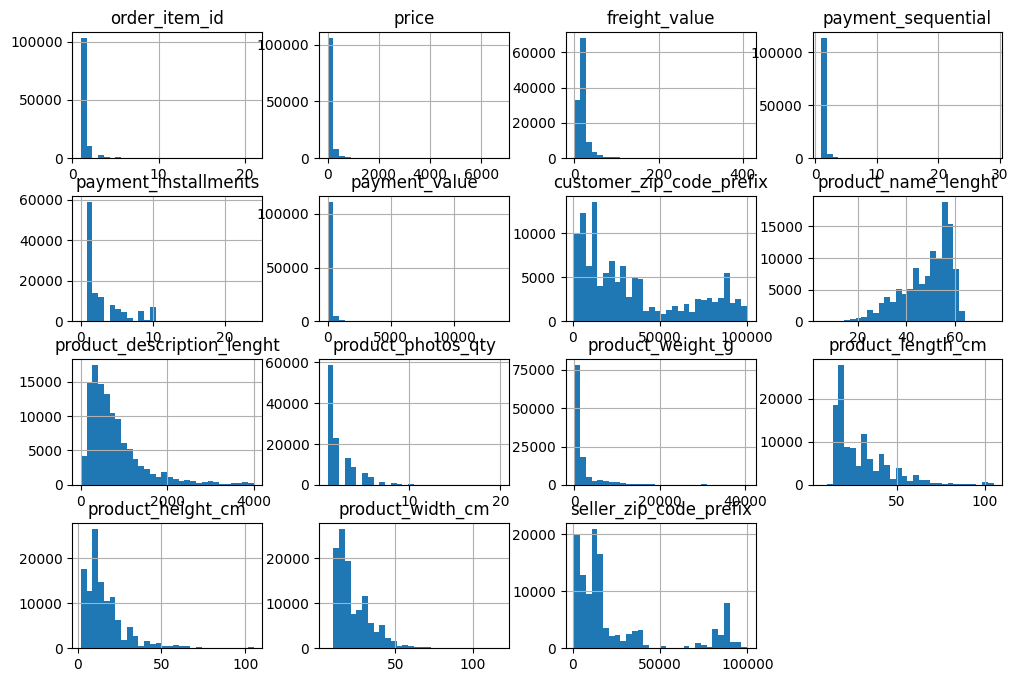

In [103]:
# Histogram untuk melihat distribusi data numerik
df.hist(figsize=(12,8), bins=30)
plt.show()

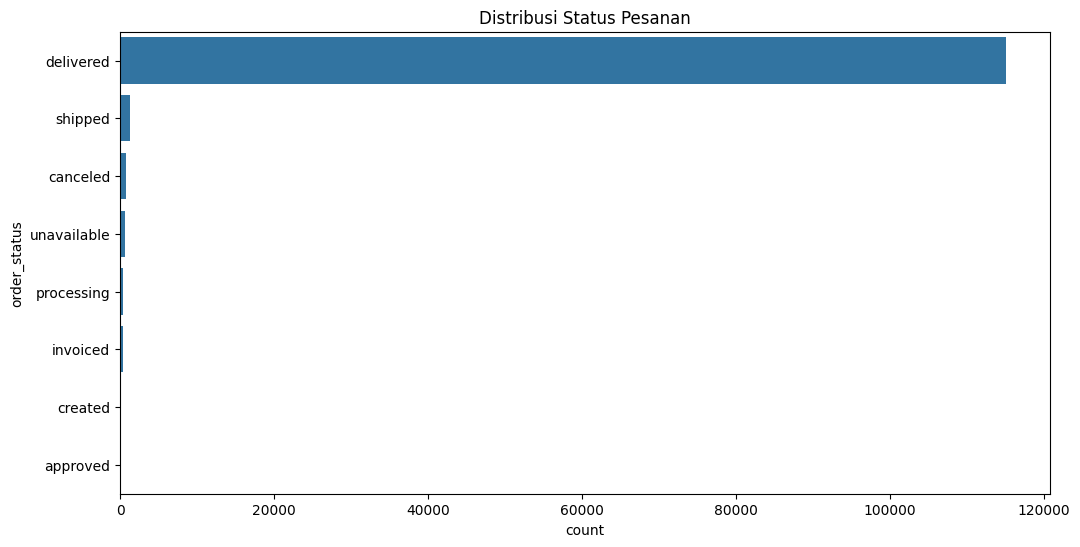

In [104]:
# Plot distribusi kategori
plt.figure(figsize=(12,6))
sns.countplot(y=df['order_status'], order=df['order_status'].value_counts().index)
plt.title("Distribusi Status Pesanan")
plt.show()

### Pertanyaan 1: Produk Paling Banyak Dibeli dalam 6 Bulan Terakhir & Tren Pembelian?

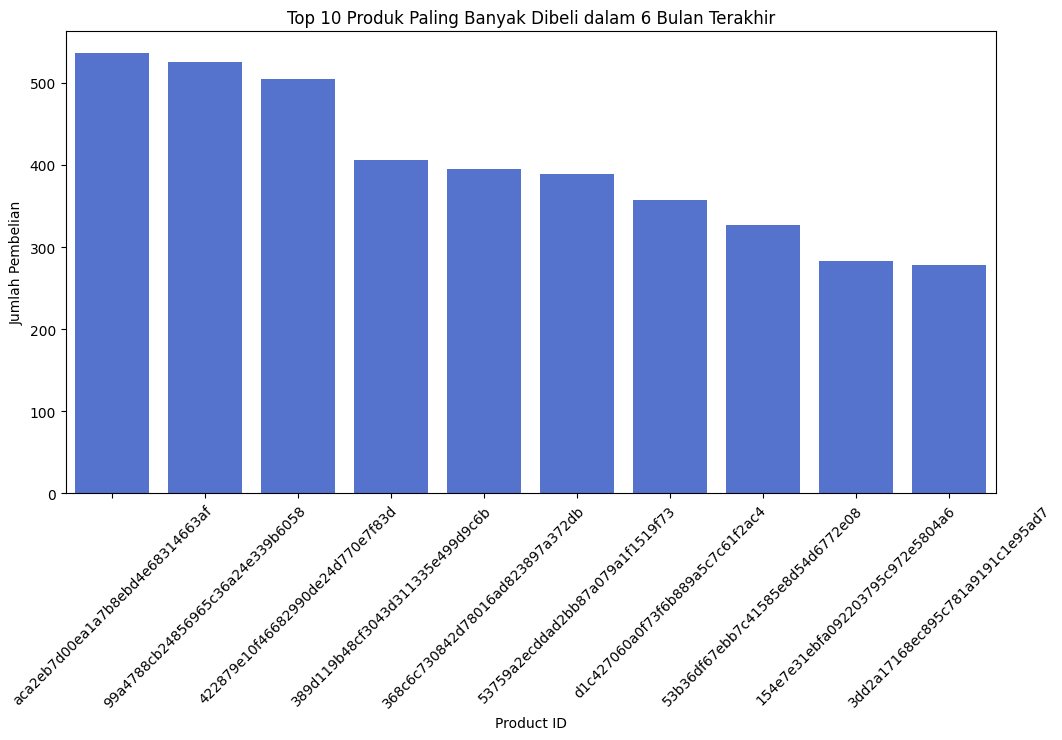

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="product_id", y="order_item_id", color="royalblue")
plt.xticks(rotation=45)
plt.xlabel("Product ID")
plt.ylabel("Jumlah Pembelian")
plt.title("Top 10 Produk Paling Banyak Dibeli dalam 6 Bulan Terakhir")
plt.show()

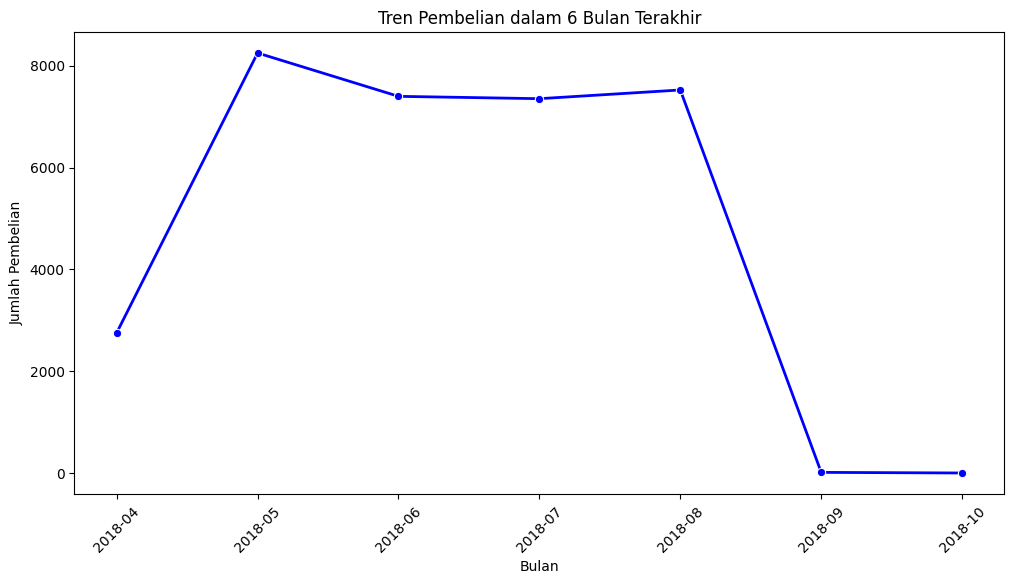

In [106]:
# Konversi purchase_month menjadi string
monthly_trend["purchase_month"] = monthly_trend["purchase_month"].astype(str)

# Visualisasi tren pembelian dari waktu ke waktu
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="purchase_month", y="order_id", marker="o", linewidth=2, color="b")
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pembelian")
plt.title("Tren Pembelian dalam 6 Bulan Terakhir")
plt.show()

### Pertanyaan 2: Pola Pembelian Berdasarkan Kategori & Retensi Pelanggan?

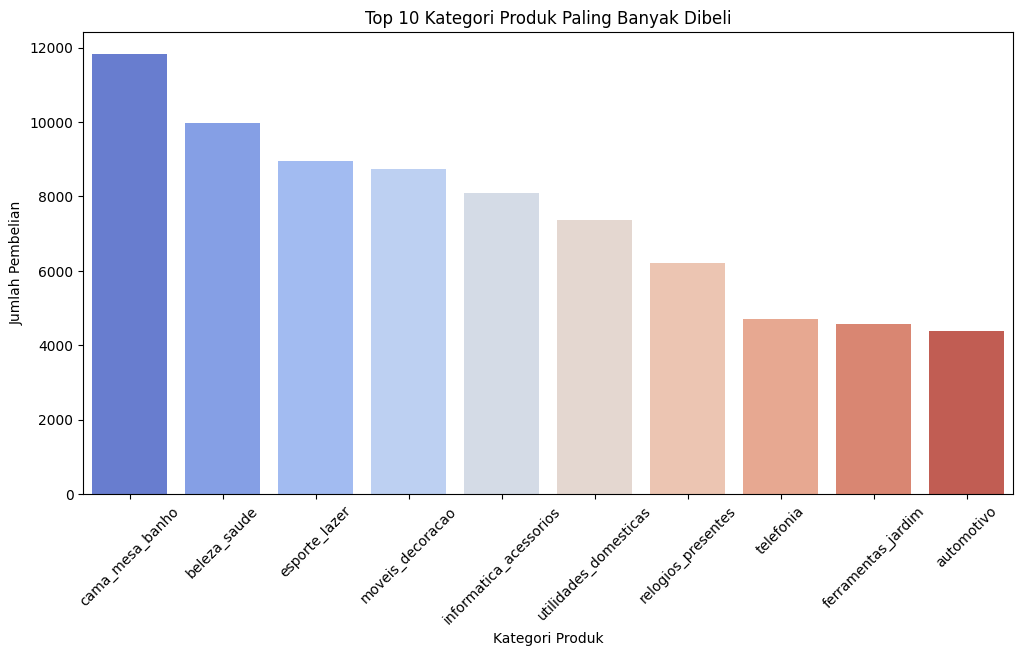

In [107]:
# Visualisasi kategori produk paling banyak dibeli
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_trend, 
    x="product_category_name", 
    y="order_item_id", 
    hue="product_category_name", 
    dodge=False,  
    palette="coolwarm",
    legend=False  
)
plt.xticks(rotation=45)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.title("Top 10 Kategori Produk Paling Banyak Dibeli")
plt.show()


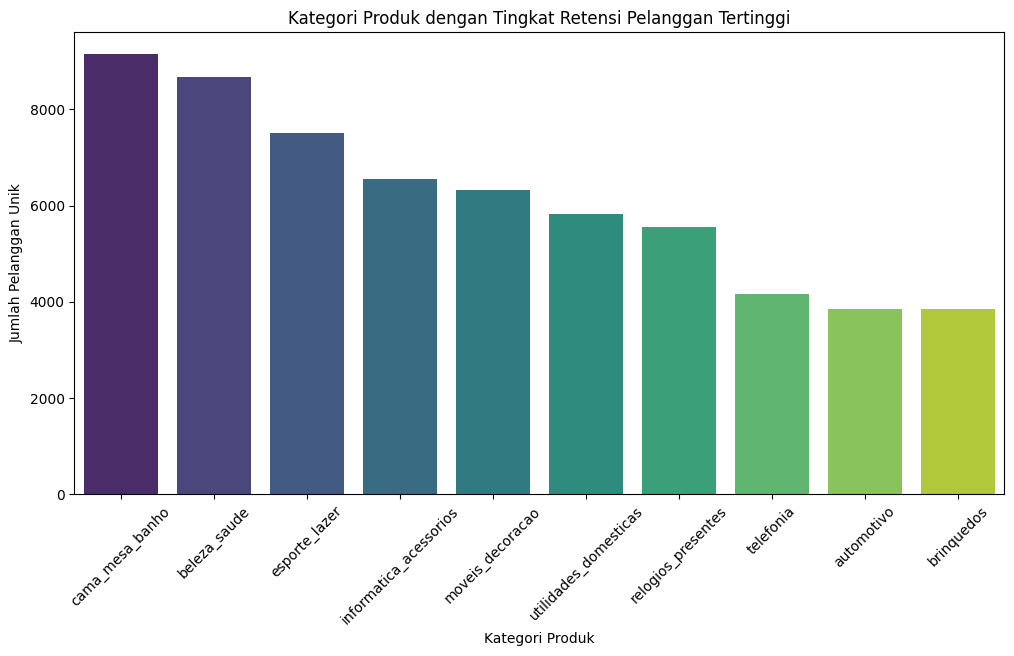

In [108]:
# Visualisasi kategori dengan tingkat retensi pelanggan tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_retention, 
    x="product_category_name", 
    y="customer_unique_id", 
    hue="product_category_name",
    dodge=False, 
    palette="viridis",
    legend=False 
)
plt.xticks(rotation=45)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pelanggan Unik")
plt.title("Kategori Produk dengan Tingkat Retensi Pelanggan Tertinggi")
plt.show()

**Insight:**

Produk Paling Banyak Dibeli dalam 6 Bulan Terakhir & Tren Pembelian:
Analisis pertama dilakukan untuk mengidentifikasi produk yang paling banyak dibeli dalam enam bulan terakhir serta bagaimana tren pembeliannya. Dengan mengekstrak data berdasarkan periode waktu terbaru, kita dapat mengamati perubahan tren serta produk mana yang memiliki permintaan tertinggi. Hasil visualisasi menunjukkan bahwa ada beberapa produk yang secara konsisten menjadi pilihan utama pelanggan. Selain itu, dengan membuat tren pembelian bulanan, kita dapat melihat pola naik turunnya jumlah transaksi yang mungkin dipengaruhi oleh faktor musiman, promosi, atau periode tertentu dalam tahun.
Pola Pembelian Berdasarkan Kategori & Retensi Pelanggan:
Selanjutnya, kita mengeksplorasi bagaimana pola pembelian berdasarkan kategori produk. Beberapa kategori produk memiliki volume transaksi yang lebih tinggi dibandingkan kategori lainnya, yang menunjukkan preferensi pelanggan terhadap jenis produk tertentu. Selain itu, analisis tingkat retensi pelanggan berdasarkan kategori produk dilakukan untuk memahami kategori mana yang memiliki loyalitas pelanggan lebih tinggi. Dengan melihat jumlah pelanggan unik yang kembali melakukan pembelian di kategori tertentu, kita dapat mengidentifikasi kategori dengan tingkat keterikatan pelanggan yang lebih kuat.
Hasil analisis ini memberikan wawasan berharga dalam memahami perilaku pelanggan dan tren pasar. Dari pola pembelian dan tingkat retensi pelanggan, dapat ditentukan strategi bisnis yang lebih efektif, seperti meningkatkan stok produk yang memiliki tren meningkat, melakukan promosi pada kategori dengan retensi pelanggan tinggi, atau mengoptimalkan strategi pemasaran untuk kategori dengan performa rendah. Dengan informasi ini, pengambilan keputusan bisnis dapat dilakukan dengan lebih terarah untuk meningkatkan penjualan dan kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

In [109]:
# Menentukan tanggal referensi sebagai transaksi terbaru dalam dataset
reference_date = df_clean["order_purchase_timestamp"].max()

# Menghitung Recency (berapa hari sejak transaksi terakhir)
df_rfm = df_clean.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,
    "order_id": "count",
    "payment_value": "sum"
}).reset_index()

# Ganti nama kolom agar sesuai dengan konsep RFM
df_rfm.rename(columns={
    "order_purchase_timestamp": "Recency",
    "order_id": "Frequency",
    "payment_value": "Monetary"
}, inplace=True)

# Tampilkan 5 baris pertama hasil RFM
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


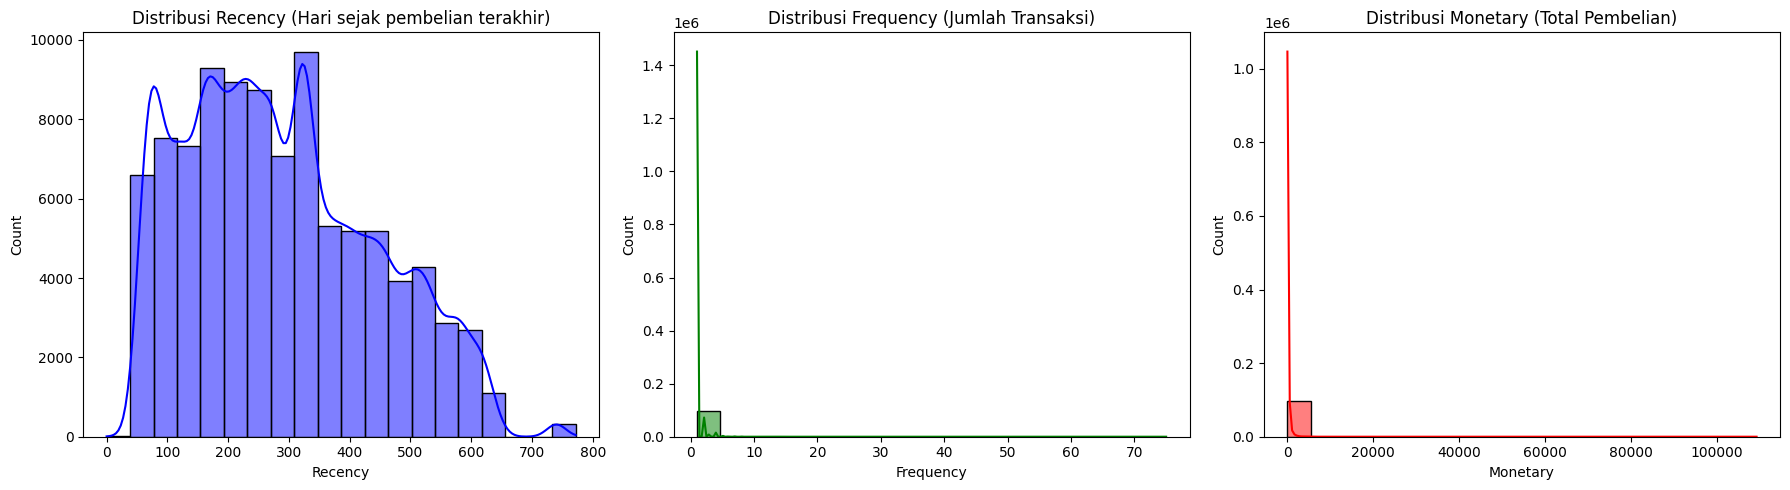

In [110]:
# Visualisasi distribusi Recency, Frequency, Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_rfm["Recency"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribusi Recency (Hari sejak pembelian terakhir)")

sns.histplot(df_rfm["Frequency"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribusi Frequency (Jumlah Transaksi)")

sns.histplot(df_rfm["Monetary"], bins=20, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribusi Monetary (Total Pembelian)")

plt.tight_layout()
plt.show()

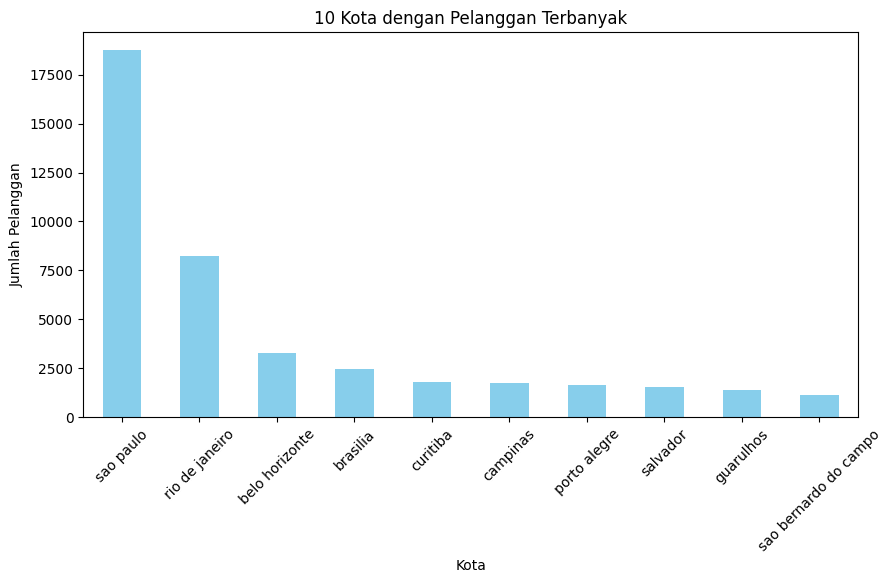

In [111]:
# Load dataset
df_clean = pd.read_csv("dashboard/main_data.csv")

# Hitung jumlah pelanggan per kota
city_counts = df_clean["customer_city"].value_counts().head(10)

# Plot data
plt.figure(figsize=(10, 5))
city_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.title("10 Kota dengan Pelanggan Terbanyak")
plt.xticks(rotation=45)
plt.show()

## Conclusion

Dalam analisis ini, kita telah melalui beberapa tahapan penting untuk memahami data pelanggan dengan lebih baik. Proses dimulai dengan data gathering, di mana kita mengumpulkan dataset yang berisi informasi pelanggan, termasuk lokasi mereka. Setelah data terkumpul, langkah berikutnya adalah assessing, yaitu mengevaluasi struktur data, mengecek kualitasnya, dan mengidentifikasi potensi masalah seperti nilai yang hilang atau inkonsistensi.
Setelah itu, dilakukan data cleaning untuk memastikan dataset bersih dan siap untuk dianalisis. Ini mencakup penanganan nilai yang hilang, duplikasi, serta memastikan format data yang sesuai. Dengan data yang sudah bersih, tahap berikutnya adalah exploratory data analysis (EDA), di mana kita mulai memahami pola-pola dalam data melalui berbagai teknik statistik dan visualisasi awal. Pada tahap ini, kita mencoba menggunakan berbagai metode untuk melihat bagaimana data pelanggan tersebar berdasarkan lokasi mereka.
Dalam proses explanation & visualization, kita awalnya mencoba menerapkan heatmap untuk menampilkan distribusi pelanggan secara geografis. Namun, karena keterbatasan memori saat mengolah data dalam jumlah besar, pendekatan ini kurang efektif. Sebagai alternatif, kita memilih metode yang lebih ringan namun tetap memberikan insight yang kuat, yaitu visualisasi dalam bentuk diagram batang untuk menunjukkan kota dengan jumlah pelanggan terbanyak.
Analisis lanjutan dilakukan untuk menggali lebih dalam bagaimana distribusi pelanggan berdasarkan lokasi dapat memberikan wawasan strategis. Dari hasil visualisasi, kita bisa melihat bahwa pelanggan terkonsentrasi di beberapa kota besar, yang dapat menjadi dasar pertimbangan dalam pengambilan keputusan bisnis, seperti strategi pemasaran atau ekspansi layanan.
Keseluruhan proses ini memberikan pemahaman yang lebih jelas tentang pola data pelanggan, sekaligus menunjukkan pentingnya memilih metode analisis yang sesuai dengan keterbatasan teknis agar tetap mendapatkan wawasan yang bermanfaat tanpa mengorbankan efisiensi.